# Thresholding 


In [135]:

#!pip install matplotlib


In [136]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Simple thresholding 

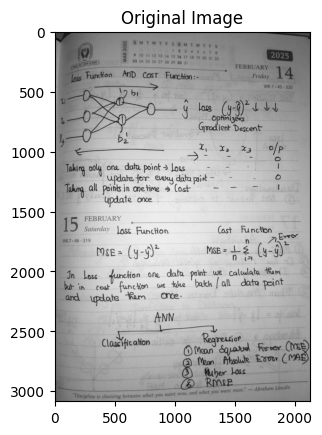

In [137]:
image = cv2.imread('./handwritten.jpeg',0)
plt.title('Original Image') 
plt.imshow(image, cmap='gray')  


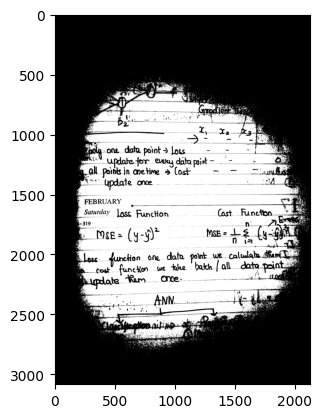

In [138]:
retval, binary = cv2.threshold(image, 150,255, cv2.THRESH_BINARY)

plt.Figure(figsize=(10,10))

plt.imshow(binary, cmap='gray')
plt.show()

### Adaptive Thresholding

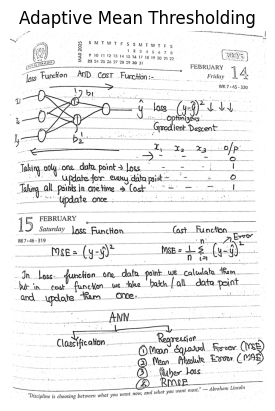

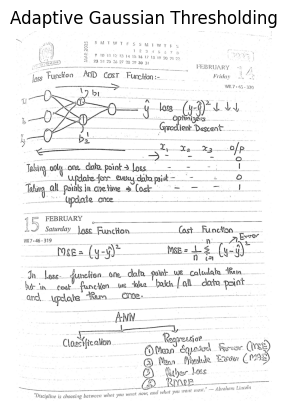

In [139]:
adaptive_m= cv2.adaptiveThreshold(image,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,9)

adaptive_g= cv2.adaptiveThreshold(image,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,9)

plt.Figure(figsize=(12,7))
plt.imshow(adaptive_m, cmap='gray')
plt.title('Adaptive Mean Thresholding')
plt.axis('off')
plt.show()

plt.Figure(figsize=(20,20))
plt.imshow(adaptive_g, cmap='gray')
plt.title('Adaptive Gaussian Thresholding')
plt.axis('off')
plt.show()

# Kmeans clustering

In [140]:
image = cv2.imread('shapes.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
pixel_values= image.reshape(-1,3)
pixel_values= np.float32(pixel_values)
print(  pixel_values)

[[253. 255. 254.]
 [253. 255. 254.]
 [253. 255. 254.]
 ...
 [253. 255. 254.]
 [253. 255. 254.]
 [253. 255. 254.]]


In [141]:
criteria= (cv2.TermCriteria_EPS+ cv2.TermCriteria_MAX_ITER,100,0.2)
k=3
_,labels, centres= cv2.kmeans(pixel_values,k,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

In [142]:
print(labels.shape)
print(centres)


(1134015, 1)
[[225.2667    95.64188   60.437798]
 [253.39117  255.29147  254.5123  ]
 [ 16.402912 238.38744  113.29766 ]]


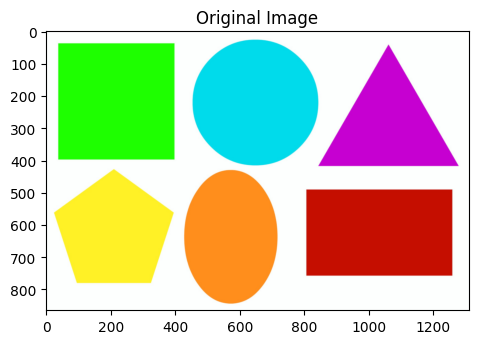

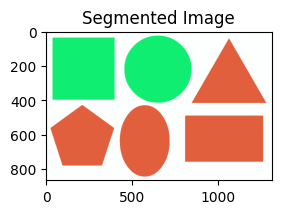

In [143]:
centres=np.uint(centres)
segmented_image= centres[labels.flatten()]
segmented_image= segmented_image.reshape(image.shape)
plt.figure(figsize=(12,10))
plt.subplot(1,2,1)
plt.imshow(image)
plt.title('Original Image')
plt.show()

plt.subplot(1,2,2)
plt.imshow(segmented_image)
plt.title('Segmented Image')
plt.show()


### Watershed algorithm

Text(0.5, 1.0, 'Original Image')

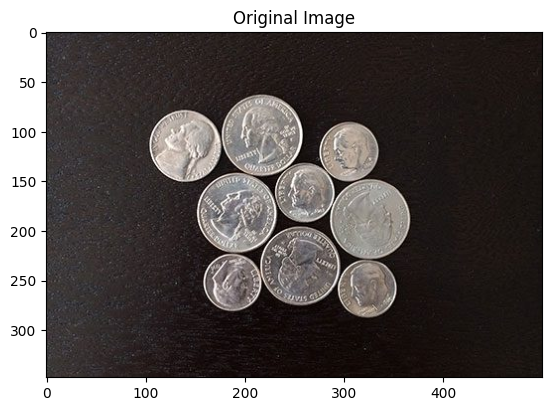

In [144]:
image = cv2.imread('coins.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
original_image = image.copy()
plt.imshow(image)
plt.title('Original Image')


Text(0.5, 1.0, 'Gray Image')

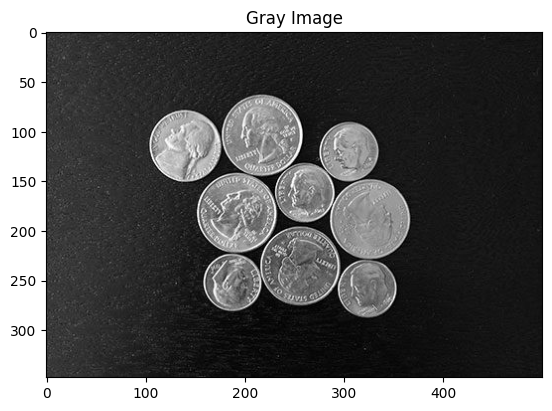

In [145]:
grey= cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(grey, cmap='gray')   
plt.title('Gray Image')

(np.float64(-0.5), np.float64(499.5), np.float64(347.5), np.float64(-0.5))

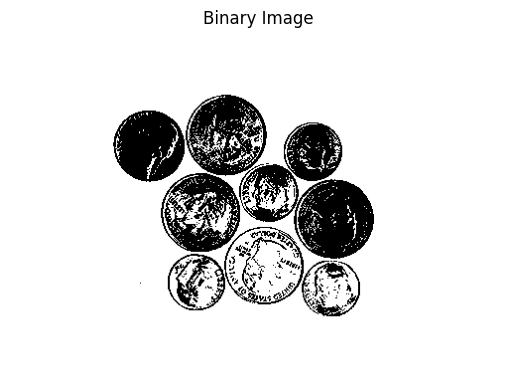

In [146]:
_, thresh= cv2.threshold(gray, 130, 255, cv2.THRESH_BINARY_INV)
plt.imshow(thresh, cmap='gray')
plt.title('Binary Image')
plt.axis('off')     

Text(0.5, 1.0, 'Opening')

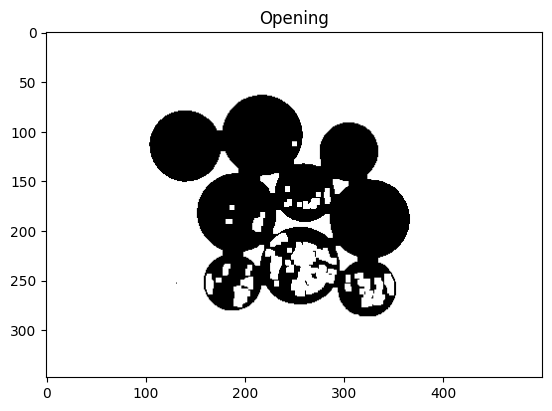

In [147]:
kernel = np.ones((3, 3), np.uint8) 
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

plt.imshow(opening, cmap='gray')
plt.title('Opening')


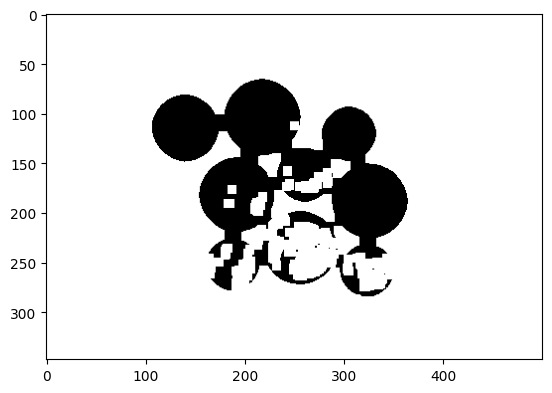

In [148]:
sure_bg=cv2.dilate(opening, kernel, iterations=2)
plt.imshow(sure_bg, cmap='gray')


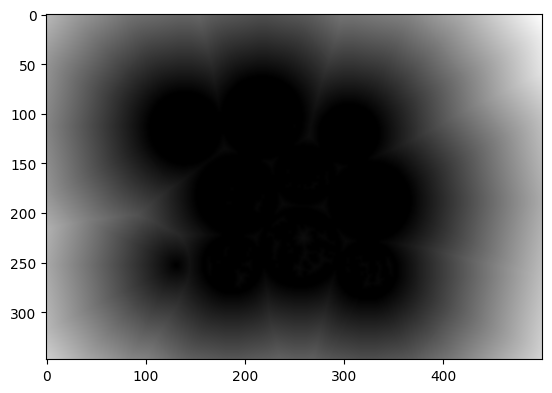

In [149]:
dist_transform= cv2.distanceTransform(opening, cv2.DIST_L2, 5)
plt.imshow(dist_transform   , cmap='gray')  



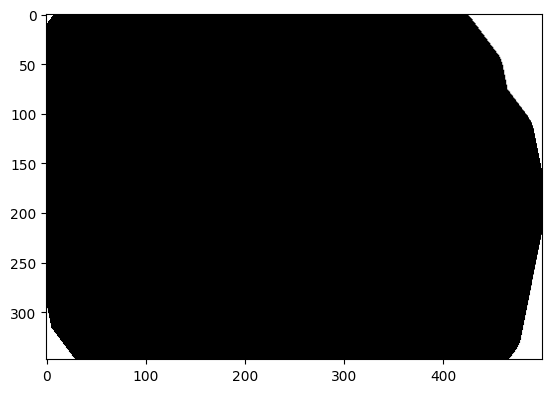

In [150]:
_, sure_fg=cv2.threshold(dist_transform, 0.7*dist_transform.max(), 255, 0)

sure_fg=np.uint8(sure_fg)
plt.imshow(sure_fg, cmap='gray')


Text(0.5, 1.0, 'Unknown Region')

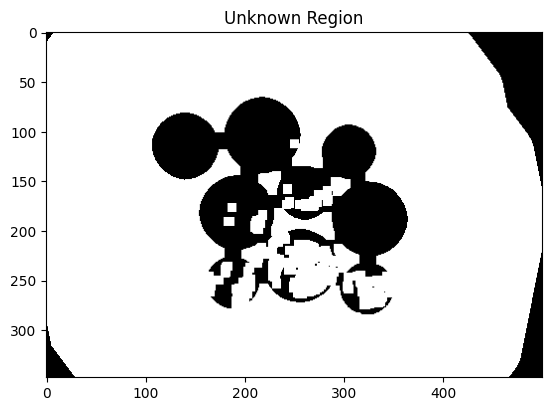

In [151]:
unkown= cv2.subtract(sure_bg, sure_fg) 
plt.imshow(unkown, cmap='gray')
plt.title('Unknown Region')

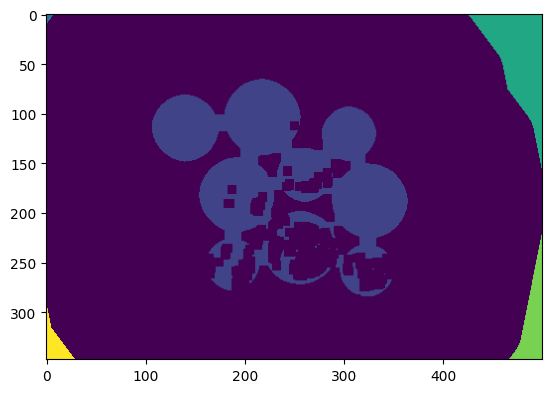

In [152]:
_,markers=cv2.connectedComponents(sure_fg)
markers= markers+1
markers[unkown==255]=0
plt.imshow(markers)

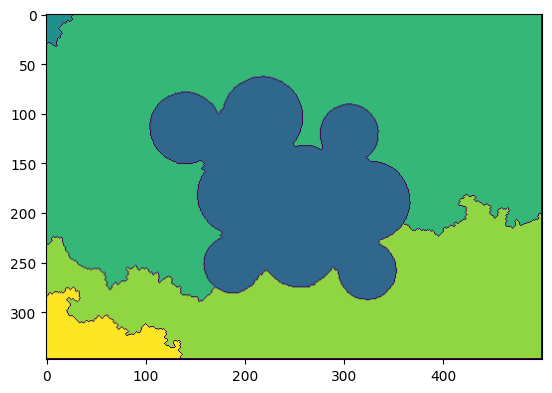

In [160]:
markers= cv2.watershed(original_image, markers)
plt.imshow(markers)

In [ ]:
coin_mask = np.zeros_like(grey)

print(grey.shape)
print(coin_mask.shape)

unique_labels = np.unique(markers)

instance_number = 1
font = cv2.FONT_HERSHEY_SIMPLEX

for label in unique_labels:
    if label == 0 or label == -1:
        continue

    mask = np.uint8(markers == label)
    contours, _ = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)  # Ensure mask is copied

    for contour in contours:
        area = cv2.contourArea(contour)
        perimeter = cv2.arcLength(contour, True) 

        if perimeter == 0:
            continue

        circularity = 4 * np.pi * (area / (perimeter * perimeter))

        if 0.7 < circularity < 1.2 and area > 1000:
            cv2.drawContours(original_image, [contour], -1, (0, 255, 0), 2)
            x, y, w, h = cv2.boundingRect(contour)
            cv2.putText(original_image, f'Coin {instance_number}', (x, y - 10), font, 0.6, (255, 0, 0), 2)
            coin_mask = cv2.bitwise_or(coin_mask, mask)
            cv2.rectangle(original_image, (x - 5, y - 5), (x + w + 5, y + h + 5), (160, 150, 250), 2)
            instance_number += 1


(348, 500)
(348, 500)


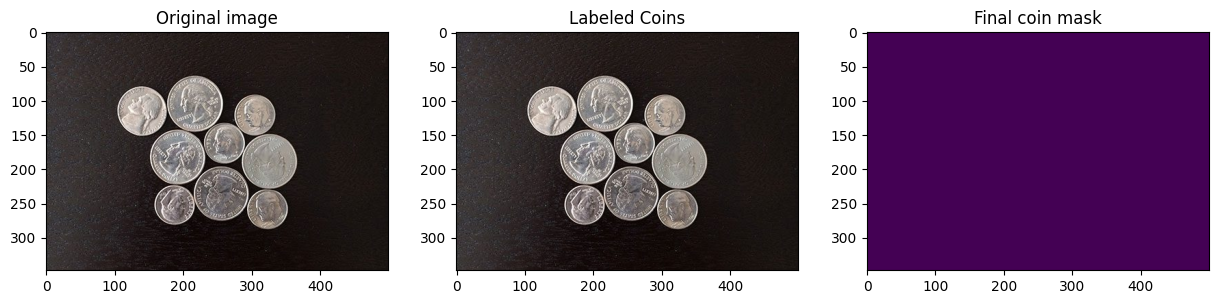

In [166]:
plt.figure(figsize=(15,10))


plt.subplot(1,3,1)
plt.imshow(original_image)
plt.title("Original image")

plt.subplot(1,3,2)
plt.imshow(original_image)
plt.title("Labeled Coins")

plt.subplot(1,3,3)
plt.imshow(coin_mask)
plt.title("Final coin mask")

plt.show()